# X-ray Projection Render Demo

This notebook demonstrates how to use the Python bindings for xray_projection_render to generate X-ray projections of 3D objects.

In [ ]:
# Install required packages
%pip install matplotlib Pillow

# Install xray-renderer package (if not already installed)
# In Binder, the repository is cloned, so we install from the local directory
# For production/PyPI: %pip install xray-renderer
try:
    import xray_projection_render
    print("✓ xray-renderer package already installed")
except ImportError:
    print("Installing xray-renderer package...")
    from pathlib import Path
    # Try to install from parent directory (development mode - works in Binder)
    parent_dir = Path().absolute().parent.parent
    if (parent_dir / "pyproject.toml").exists():
        # Use !pip (shell command) which works in Binder and supports variables
        !pip install -e {str(parent_dir)}
        print("✓ Installed xray-renderer in development mode")
    else:
        # Fallback to PyPI (when available)
        %pip install xray-renderer
        print("✓ Installed xray-renderer from PyPI")

# Import and initialize the renderer
# The library will be automatically discovered from:
# 1. Installed package location
# 2. Development mode (relative to package)
# 3. GitHub releases (downloaded automatically if needed)
from xray_projection_render import XRayRenderer

try:
    renderer = XRayRenderer()
    print("✓ Successfully loaded XRayRenderer")
    print("  Library will be automatically found or downloaded from GitHub releases if needed")
except Exception as e:
    print(f"✗ Error loading XRayRenderer: {e}")
    print("\nIf you're in development mode, ensure the shared library is built:")
    print("  cd ../.. && ./build.sh")
    raise

# Render 3 equispaced projections of a simple object

In [ ]:
from PIL import Image

# Display the rendered projections

In [ ]:
# Render 3 equispaced projections
# Using log_level='info' to show progress messages
params = {
    'input': 'cube_w_hole.yaml',
    'num_images': 3,
    'resolution': 300,
    'output_dir': 'images',
    'fname_pattern': 'image_%03d.png',
    'log_level': 'info'  # Show info messages (progress, status updates)
}

result = renderer.render(params)

if result['success']:
    print(f"✓ Successfully rendered {result['num_images']} images")
else:
    print(f"✗ Error: {result.get('error', 'Unknown error')}")

In [ ]:
# Display the three projections side by side
dst = Image.new('L', (3*300, 300))
dst.paste(Image.open('./images/image_000.png'), (0, 0))
dst.paste(Image.open('./images/image_001.png'), (300, 0))
dst.paste(Image.open('./images/image_002.png'), (600, 0))
display(dst)

 100% |█████████████████████████████████████████████████| (3/3, 4 it/s)        


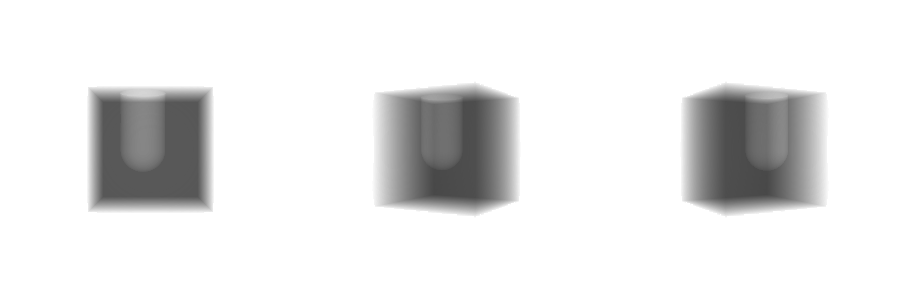

In [ ]:
# Render all example objects
objs = ['balls.json','box_w_pped.yaml','cube_w_hole.yaml','lattice.yaml','pillar_array.json']
dst = Image.new('L', (len(objs)*300, 300))

for i, obj in enumerate(objs):
    fname_pattern = f"{obj.split('.')[0]}_%03d.png"
    
    params = {
        'input': obj,
        'resolution': 300,
        'fname_pattern': fname_pattern,
        'output_dir': 'images',
        'out_of_plane': True,  # Generate out-of-plane projections
        'num_images': 1
    }
    
    result = renderer.render(params)
    
    if result['success']:
        # Load the first (and only) image
        img_path = f'./images/{fname_pattern % 0}'
        dst.paste(Image.open(img_path), (i*300, 0))
        print(f"✓ Rendered {obj}")
    else:
        print(f"✗ Error rendering {obj}: {result.get('error', 'Unknown error')}")

display(dst)